## 01. Import Libraries

In [3]:
# import library

import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt 

## 02. Import Data

In [6]:
# using final data set here:

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_19222/730044777.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)


## 03. Final Derivations / Wrangling

In [9]:
# inspecting df:

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105


In [11]:
# double checking that lat & long are consistent

print(df['start_station_name'].value_counts())
print(df['start_lng'].value_counts())

start_station_name
W 21 St & 6 Ave                   32322
West St & Chambers St             30728
Broadway & W 58 St                28794
6 Ave & W 33 St                   26504
1 Ave & E 68 St                   26103
                                  ...  
College Ave & E 169 St                3
Lexington Ave & Stuyvesant Ave        2
Schermerhorn St and Court St          1
E 6 St 2 Ave                          1
Sharon St & Olive St_new              1
Name: count, Length: 1761, dtype: int64
start_lng
-73.994156    28931
-74.013221    27846
-73.981693    24468
-73.988484    23527
-73.958185    21931
              ...  
-73.935988        1
-73.969090        1
-73.920897        1
-73.918697        1
-73.978084        1
Name: count, Length: 546863, dtype: int64


In [13]:
# For consistency, I am going to keep the first instance of coordinates for each station.
# going to first take a subset of the df, then drop any duplicates
# finally going to set the index as the station name
# then going to use .map() to add it back into our df
# then going to recalculate rides/stations

first_start_coords = df.drop_duplicates(subset = 'start_station_name', keep = 'first')[['start_station_name', 'start_lat', 'start_lng']]

# Set 'start_station_name' as the index for easier mapping
first_start_coords.set_index('start_station_name', inplace=True)

# Map the first start_lat and start_lng back to the original DataFrame
df['start_lat'] = df['start_station_name'].map(first_start_coords['start_lat'])
df['start_lng'] = df['start_station_name'].map(first_start_coords['start_lng'])

In [15]:
# repeating the above with end coordinates:

# get the first instance of each end station with its coordinates
first_end_coords = df.drop_duplicates(subset='end_station_name', keep='first')[['end_station_name', 'end_lat', 'end_lng']]

# Set 'end_station_name' as the index for easier mapping
first_end_coords.set_index('end_station_name', inplace=True)

# Map the first end_lat and end_lng back to the original DataFrame
df['end_lat'] = df['end_station_name'].map(first_end_coords['end_lat'])
df['end_lng'] = df['end_station_name'].map(first_end_coords['end_lng'])

In [17]:
print(df['end_station_name'].value_counts())
print(df['end_lng'].value_counts())

end_station_name
W 21 St & 6 Ave          32406
West St & Chambers St    31057
Broadway & W 58 St       27501
6 Ave & W 33 St          26346
1 Ave & E 68 St          26158
                         ...  
Adams St & 11 St             1
Baldwin at Montgomery        1
Sip Ave                      1
Clinton St & 7 St            1
Heights Elevator             1
Name: count, Length: 1814, dtype: int64
end_lng
-73.994156    32406
-74.013221    31057
-73.981693    27501
-73.988484    26346
-73.958185    26158
              ...  
-74.063913        1
-74.042884        1
-74.064194        1
-74.050990        1
-74.071262        1
Name: count, Length: 1796, dtype: int64


In [19]:
print(df['start_station_name'].value_counts())
print(df['start_lng'].value_counts())

start_station_name
W 21 St & 6 Ave                   32322
West St & Chambers St             30728
Broadway & W 58 St                28794
6 Ave & W 33 St                   26504
1 Ave & E 68 St                   26103
                                  ...  
College Ave & E 169 St                3
Lexington Ave & Stuyvesant Ave        2
Schermerhorn St and Court St          1
E 6 St 2 Ave                          1
Sharon St & Olive St_new              1
Name: count, Length: 1761, dtype: int64
start_lng
-73.994156    32322
-74.013221    30728
-73.981693    28794
-73.988484    26504
-73.958185    26103
              ...  
-73.898385        4
-73.950700        4
-73.911922        3
-73.933794        2
-73.938457        1
Name: count, Length: 1745, dtype: int64


In [43]:
# these are a lot more consistent. Exporting this as our dataframe before making any other derivations:

df.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts_LATLNG_WRANGLED.csv')

In [23]:
# now let's create a column for the month:

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,1
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105,1
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105,1
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105,1
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105,1


In [25]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month
7441503,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,2022-12-31,8.2,20.794300,7858,12
7441504,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789622,-73.977570,40.771639,-73.982614,member,2022-12-31,8.2,17.488050,7858,12
7441505,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775730,-73.956753,40.742869,-73.989186,member,2022-12-31,8.2,21.420017,7858,12
7441506,3D1AA39C8C8A4640,electric_bike,2022-12-31 09:30:41.261,2022-12-31 09:34:42.217,W 70 St & Amsterdam Ave,7207.08,11 Ave & W 59 St,7059.01,40.777480,-73.982886,40.771497,-73.990460,member,2022-12-31,8.2,4.015933,7858,12
7441507,1701C59034632238,classic_bike,2022-12-31 15:28:48.133,2022-12-31 15:30:33.779,Montague St & Clinton St,4677.06,Henry St & Remsen St,4645.04,40.694271,-73.992327,40.694010,-73.994651,member,2022-12-31,8.2,1.760767,7858,12


In [27]:
# as we know this is in chronological order, the month is as we expect it to be!

# now we can create a seasonal flag and a new column!

# Winter December(12/21) - March(03/20)
# Spring March(03/21) - June(06/20)
# Summer June(06/21) - September(09/20)
# Fall September(09/21) - December(12/20)

# While these are calendar dates, we could simplify this into the following:
# Winter: Months 12-2
# Spring: Months 3-5
# Summer: Months 6-8
# Fall: Months 9-11


# going to use a lambda function to iterate over the dataframe:

df['season'] = df['month'].apply(lambda x:
                                 "winter" if (x == 12 or 1 <= x <= 2)
                                 else "spring" if (3 <= x <= 5)
                                 else "summer" if (6 <= x <= 8)
                                 else "fall") # meaning that fall will b if x is in 9, 10, 11

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month,season
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,1,winter
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105,1,winter
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105,1,winter
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105,1,winter
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441503,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,2022-12-31,8.2,20.794300,7858,12,winter
7441504,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789622,-73.977570,40.771639,-73.982614,member,2022-12-31,8.2,17.488050,7858,12,winter
7441505,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775730,-73.956753,40.742869,-73.989186,member,2022-12-31,8.2,21.420017,7858,12,winter
7441506,3D1AA39C8C8A4640,electric_bike,2022-12-31 09:30:41.261,2022-12-31 09:34:42.217,W 70 St & Amsterdam Ave,7207.08,11 Ave & W 59 St,7059.01,40.777480,-73.982886,40.771497,-73.990460,member,2022-12-31,8.2,4.015933,7858,12,winter


In [61]:
# now we have months AND seasons, let's export this as our final dataframe and do some visualizations!

df.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL_df.csv')

## 04. Data Viz

In [99]:
# lets create some visualizations before creating the dashboard in streamlit!
# going to import our top paths dataframe just in case we need it :)

In [87]:
# import data:

top20 = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/top_20_stations_most_popular_ride_paths_w_coordinates_SORTED.csv', index_col = 0)

In [89]:
top20

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,path_count
0,1 Ave & E 110 St,1 Ave & E 68 St,40.792327,-73.938300,40.765005,-73.958185,7
1,1 Ave & E 110 St,11 Ave & W 41 St,40.792327,-73.938300,40.760301,-73.998842,1
2,1 Ave & E 110 St,12 Ave & W 40 St,40.792327,-73.938300,40.760875,-74.002777,7
3,1 Ave & E 110 St,6 Ave & W 33 St,40.792327,-73.938300,40.749013,-73.988484,1
4,1 Ave & E 110 St,6 Ave & W 34 St,40.792327,-73.938300,40.749640,-73.988050,2
...,...,...,...,...,...,...,...
31329,Wythe Ave & Metropolitan Ave,W 31 St & 7 Ave,40.716887,-73.963198,40.749156,-73.991600,2
31330,Wythe Ave & Metropolitan Ave,West St & Chambers St,40.716887,-73.963198,40.717548,-74.013221,7
31331,Wythe Ave & Metropolitan Ave,West St & Liberty St,40.716887,-73.963198,40.711444,-74.014847,11
31332,Yankee Ferry Terminal,West St & Chambers St,40.687066,-74.016756,40.717548,-74.013221,2


In [95]:
# let's order this by path_count

top20_sorted = top20.sort_values(by='path_count', ascending=False)

In [97]:
top20_sorted

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,path_count
12207,Central Park S & 6 Ave,Central Park S & 6 Ave,40.765909,-73.976342,40.765909,-73.976342,2991
26255,W 21 St & 6 Ave,9 Ave & W 22 St,40.741740,-73.994156,40.745497,-74.001971,1615
133,1 Ave & E 62 St,1 Ave & E 68 St,40.761227,-73.960940,40.765005,-73.958185,1434
10893,Broadway & W 58 St,Broadway & W 58 St,40.766953,-73.981693,40.766953,-73.981693,1379
1968,12 Ave & W 40 St,12 Ave & W 40 St,40.760875,-74.002777,40.760875,-74.002777,1301
...,...,...,...,...,...,...,...
8251,Broadway & E 14 St,Halsey St & Tompkins Ave,40.734546,-73.990741,40.682369,-73.944118,1
8239,Broadway & E 14 St,Greene Ave & Nostrand Ave,40.734546,-73.990741,40.688334,-73.950916,1
8233,Broadway & E 14 St,Grand Concourse & E 167 St,40.734546,-73.990741,40.834263,-73.917641,1
8229,Broadway & E 14 St,Graham Ave & Withers St,40.734546,-73.990741,40.716981,-73.944859,1


In [101]:
# cool! now that this is sorted, lets work on a bar chart using plotly!
# While we have the most popular paths, It could be helpful to see the most popular starting and end stations
# going to create two separate charts!

In [104]:
# first step is to group our dataframe by stations:

df['start_value'] = 1
df_top20start = df.groupby('start_station_name')['start_value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20start = df_top20start.nlargest(20, 'start_value')
top20start

,start_station_name,start_value
1587,W 21 St & 6 Ave,32322
1718,West St & Chambers St,30728
495,Broadway & W 58 St,28794
286,6 Ave & W 33 St,26504
8,1 Ave & E 68 St,26103
485,Broadway & W 25 St,24676
461,Broadway & E 14 St,24503
1511,University Pl & E 14 St,24192
463,Broadway & E 21 St,23671
1603,W 31 St & 7 Ave,23465


In [106]:
# let's do a quick repeat for the end stations as well!

df['end_value'] = 1
df_top20end = df.groupby('end_station_name')['end_value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20end = df_top20end.nlargest(20, 'end_value')
top20end

,end_station_name,end_value
1637,W 21 St & 6 Ave,32406
1770,West St & Chambers St,31057
508,Broadway & W 58 St,27501
289,6 Ave & W 33 St,26346
8,1 Ave & E 68 St,26158
498,Broadway & W 25 St,24864
1560,University Pl & E 14 St,24832
474,Broadway & E 14 St,24398
476,Broadway & E 21 St,23920
1653,W 31 St & 7 Ave,23453


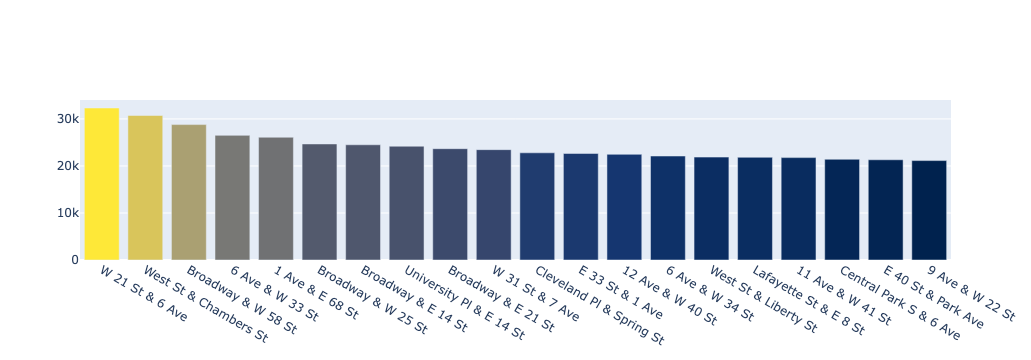

In [163]:
# perfect, now we can create bar charts for both using plotly!

fig = go.Figure(go.Bar(x = top20start['start_station_name'],
                       y = top20start['start_value'],
                       marker = {'color':top20start['start_value'], 'colorscale' : 'cividis'}
                      ))
fig.show()

# burgyl, reds, cividis are all color palettes I'm interesting in possibly working with for this task

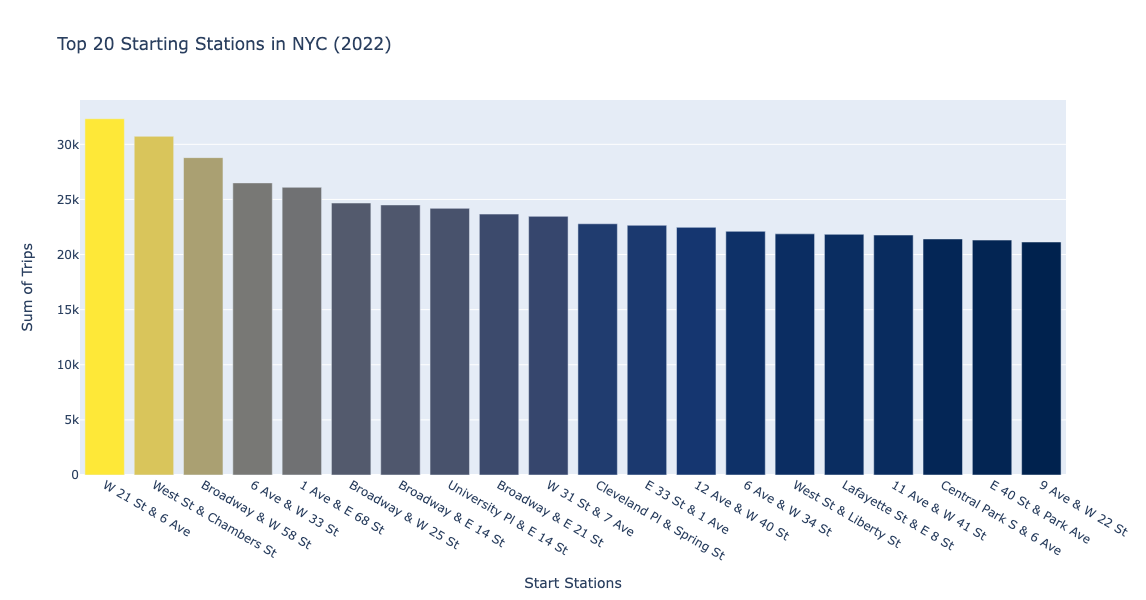

In [155]:
# going to add a title:

fig.update_layout(
     title = 'Top 20 Starting Stations in NYC (2022)',
     xaxis_title = 'Start Stations',
     yaxis_title ='Sum of Trips',
     width = 900, height = 600)

In [157]:
# let's save this! then repeat for ending stations!

# Save the top 20 stations as a CSV file

top20start.to_csv('top20starting_stations.csv')

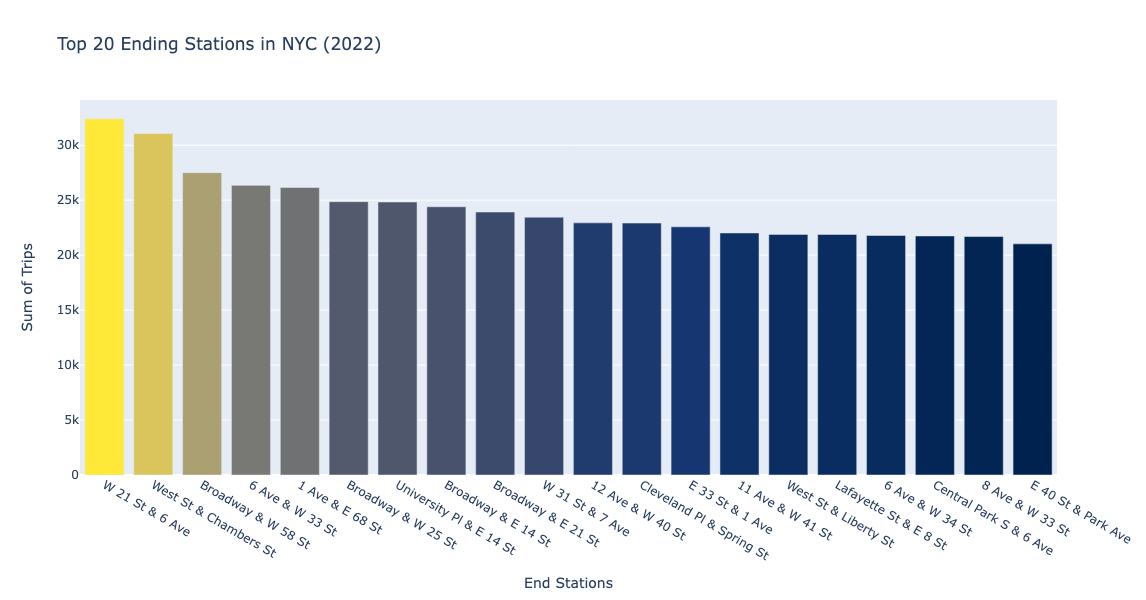

In [161]:
fig2 = go.Figure(go.Bar(x = top20end['end_station_name'],
                       y = top20end['end_value'],
                       marker = {'color':top20start['start_value'], 'colorscale' : 'cividis'}
                      ))
fig2.update_layout(
     title = 'Top 20 Ending Stations in NYC (2022)',
     xaxis_title = 'End Stations',
     yaxis_title ='Sum of Trips',
     width = 900, height = 600)

fig2.show()

In [165]:
# looks good, going to export the top 20 end

# Save the top 20 stations as a CSV file

top20end.to_csv('top20ending_stations.csv')

In [29]:
# let's revisit the dual axis line chart we did earlier:
# it involved charting the avg daily temp AND the daily ride count!

# need to set the date as the index to graph this more easily!

df_temp = df.drop_duplicates(subset='date', keep='first')
df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,month,season
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,1,winter
5105,EF47BB9761EB7F50,electric_bike,2022-01-02 11:38:08.176,2022-01-02 11:54:46.034,St James Pl & Oliver St,5238.05,8 Ave & W 31 St,6450.05,40.713079,-73.998512,40.750585,-73.994685,casual,2022-01-02,11.4,16.630967,10561,1,winter
15666,B5E8659E2663D5A8,classic_bike,2022-01-03 18:48:26.327,2022-01-03 19:11:39.596,E 65 St & 2 Ave,6860.12,Crescent St & Broadway,6827.11,40.764719,-73.962221,40.763359,-73.928647,member,2022-01-03,1.4,23.221150,8028,1,winter
23694,A6A92F9014FBE3B7,classic_bike,2022-01-04 13:05:17.258,2022-01-04 13:36:53.648,Leonard St & Church St,5359.11,Leonard St & Church St,5359.11,40.717571,-74.005549,40.717571,-74.005549,member,2022-01-04,-2.7,31.606500,9106,1,winter
32800,3EAB103A064FDA4A,classic_bike,2022-01-05 17:05:17.751,2022-01-05 17:20:00.795,W 30 St & 10 Ave,6459.07,11 Ave & W 41 St,6726.01,40.752694,-74.002353,40.760301,-73.998842,member,2022-01-05,3.2,14.717400,8309,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385723,EC385C4DBCA5BD26,electric_bike,2022-12-27 20:46:27.003,2022-12-27 21:03:13.772,Macombs Pl & W 152 St,8029.28,Lenox Ave & W 130 St,7753.13,40.826406,-73.937948,40.810792,-73.943068,member,2022-12-27,-0.7,16.779483,8341,12,winter
7394064,03C61404805FBE76,classic_bike,2022-12-28 21:17:09.129,2022-12-28 21:33:11.945,Lexington Ave & Classon Ave,4452.03,Kent Ave & N 7 St,5489.03,40.686768,-73.959282,40.720368,-73.961651,member,2022-12-28,3.4,16.046933,11007,12,winter
7405071,F4FC8BA00F9C7416,classic_bike,2022-12-29 07:13:42.345,2022-12-29 07:28:57.997,8 Ave & W 31 St,6450.05,Grand St & Greene St,5500.02,40.750585,-73.994685,40.721700,-74.002381,member,2022-12-29,6.4,15.260867,13135,12,winter
7418206,A470CFD743E2C01F,classic_bike,2022-12-30 08:20:19.185,2022-12-30 08:26:37.961,E 47 St & 2 Ave,6498.1,Grand Army Plaza & Central Park S,6839.10,40.753231,-73.970325,40.764397,-73.973715,member,2022-12-30,9.3,6.312933,15444,12,winter


In [31]:
#  let's export this for later, 

df_temp.to_csv('Daily_ride_counts_ONLY.csv')

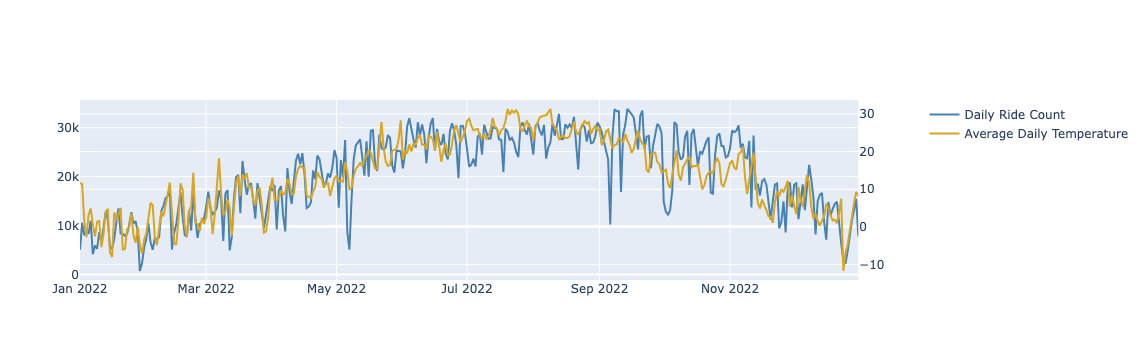

In [79]:

# going to use subplots with this :)

fig3 = make_subplots(specs = [[{"secondary_y" : True}]])

# this is important as it will allow us to add a second y-axis to the same chart!

fig3.add_trace(
    go.Scatter(x = df_temp['date'],
    y = df_temp['daily_ride_count'],
    name = "Daily Ride Count",
    marker = {'color' : 'steelblue'}),
    secondary_y = False) # false, as this is our FIRST y-axis

fig3.add_trace(
    go.Scatter(x = df_temp['date'],
               y = df_temp['average_temp'],
               name = "Average Daily Temperature",
               marker = {'color' : 'goldenrod'}),
    secondary_y = True)

fig3.show()

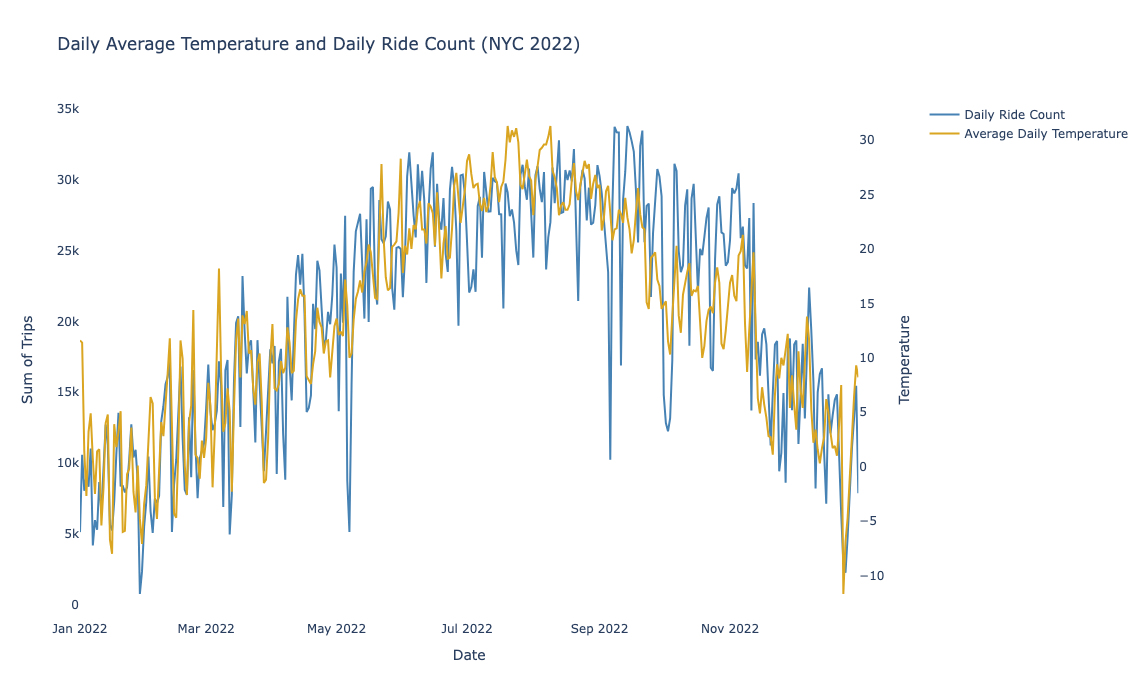

In [101]:
# now to adjust size and add titles:

fig3.update_layout(
     title = 'Daily Average Temperature and Daily Ride Count (NYC 2022)',
     xaxis_title = 'Date',
     width = 1300, height = 700,
    plot_bgcolor='white')

fig3.update_yaxes(title_text='Sum of Trips', secondary_y=False)
fig3.update_yaxes(title_text='Temperature', secondary_y=True)

fig3.show()

In [104]:
# this looks good, going to do an inspection of our df and drop any columns that might not be super necessary

df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'average_temp', 'trip_length_minutes',
       'daily_ride_count', 'month', 'season'],
      dtype='object')

In [108]:
# can probably eliminate ride_id, start_station_id, end_station_id

df1 = df.drop(columns=['ride_id', 'start_station_id','end_station_id'])
df1.shape

(7441508, 16)

In [111]:
# this is still pretty big, lets take a random sample (75% or so, then export this for our dashboard)

df2 = df1.sample(frac=0.75, random_state=43)
df2.shape

(5581131, 16)

In [113]:
# this is a little bit more manageable, we will export this, and start here, and reduce further as necessary

df2.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/FINAL DATA SETS/final_SAMPLE_set.csv')